In [9]:
import pandas as pd
import matplotlib.pyplot as plt
train_df = pd.read_csv("../new_data.csv")

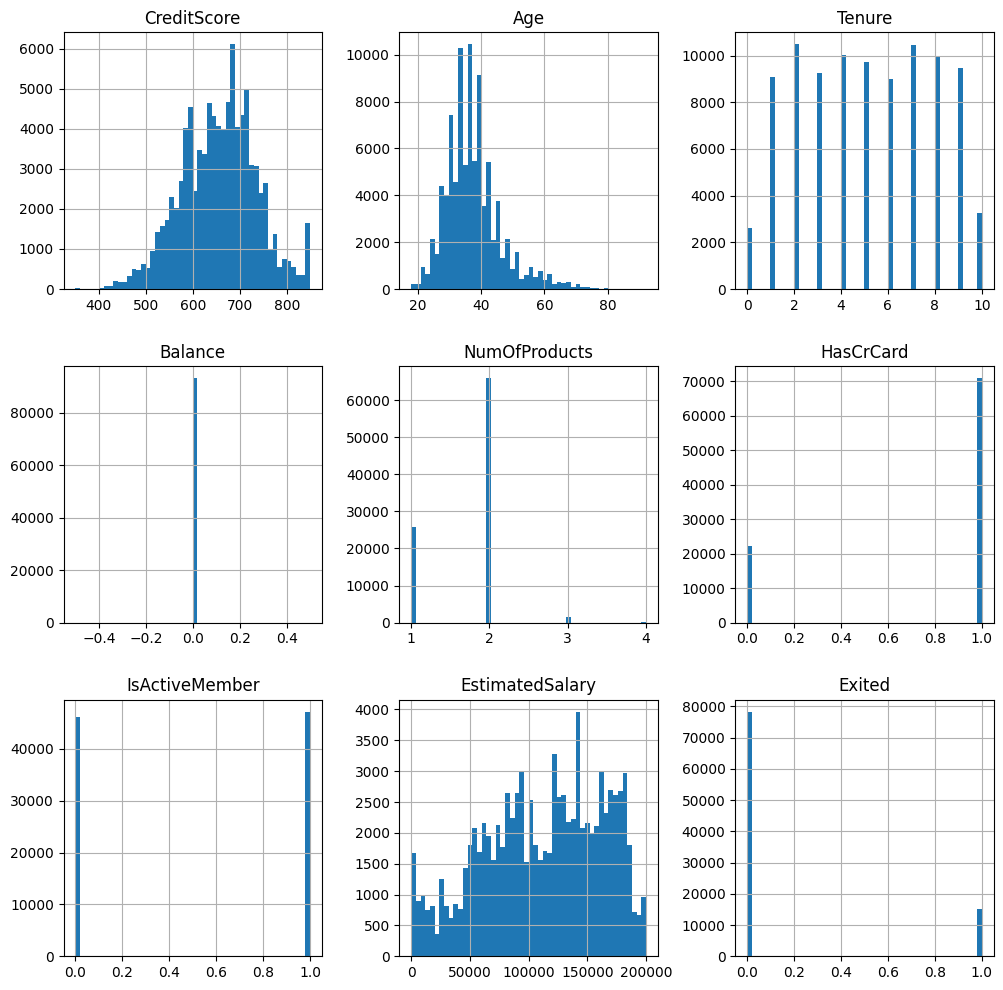

In [25]:

train_df[train_df['Balance'] == 0].drop(["id", "CustomerId", "Surname"], axis=1).hist(figsize=(12, 12), bins=50)
error_occur_data = train_df[train_df['Balance'] == 0].copy()
plt.show()

In [46]:
def plotting(title, k = -1):
    plt.figure(figsize=(20, 8))
    total_counts = error_occur_data[title].value_counts().sort_index()
    exited_0 = error_occur_data[error_occur_data['Exited'] == 0][title].value_counts()
    exited_1 = error_occur_data[error_occur_data["Exited"] == 1][title].value_counts()
    combined_df = pd.DataFrame({"Exited_0": exited_0, "Exited_1": exited_1})
    if k != -1:
        combined_data = combined_df.groupby(pd.cut(total_counts.index, k, precision=0)).sum()
        combined_data = combined_data.div(combined_data.sum(axis=1), axis=0) * 100
    else:
        combined_data = combined_df.div(combined_df.sum(axis=1), axis=0) * 100

    combined_data.sort_index().plot(kind='bar', figsize=(20, 8))
    plt.title(f"Percentage of {title}")
    plt.xlabel(title)
    plt.show()

In [78]:
interval = (error_occur_data[error_occur_data['Exited'] == 1]['CreditScore'].value_counts().sort_index() == 1)[(error_occur_data[error_occur_data['Exited'] == 1]['CreditScore'].value_counts().sort_index() == 1) == True].index
credit_score_interval = interval.to_series()
credit_score_interval.to_csv("interval_found.csv", index=False)

<Figure size 2000x800 with 0 Axes>

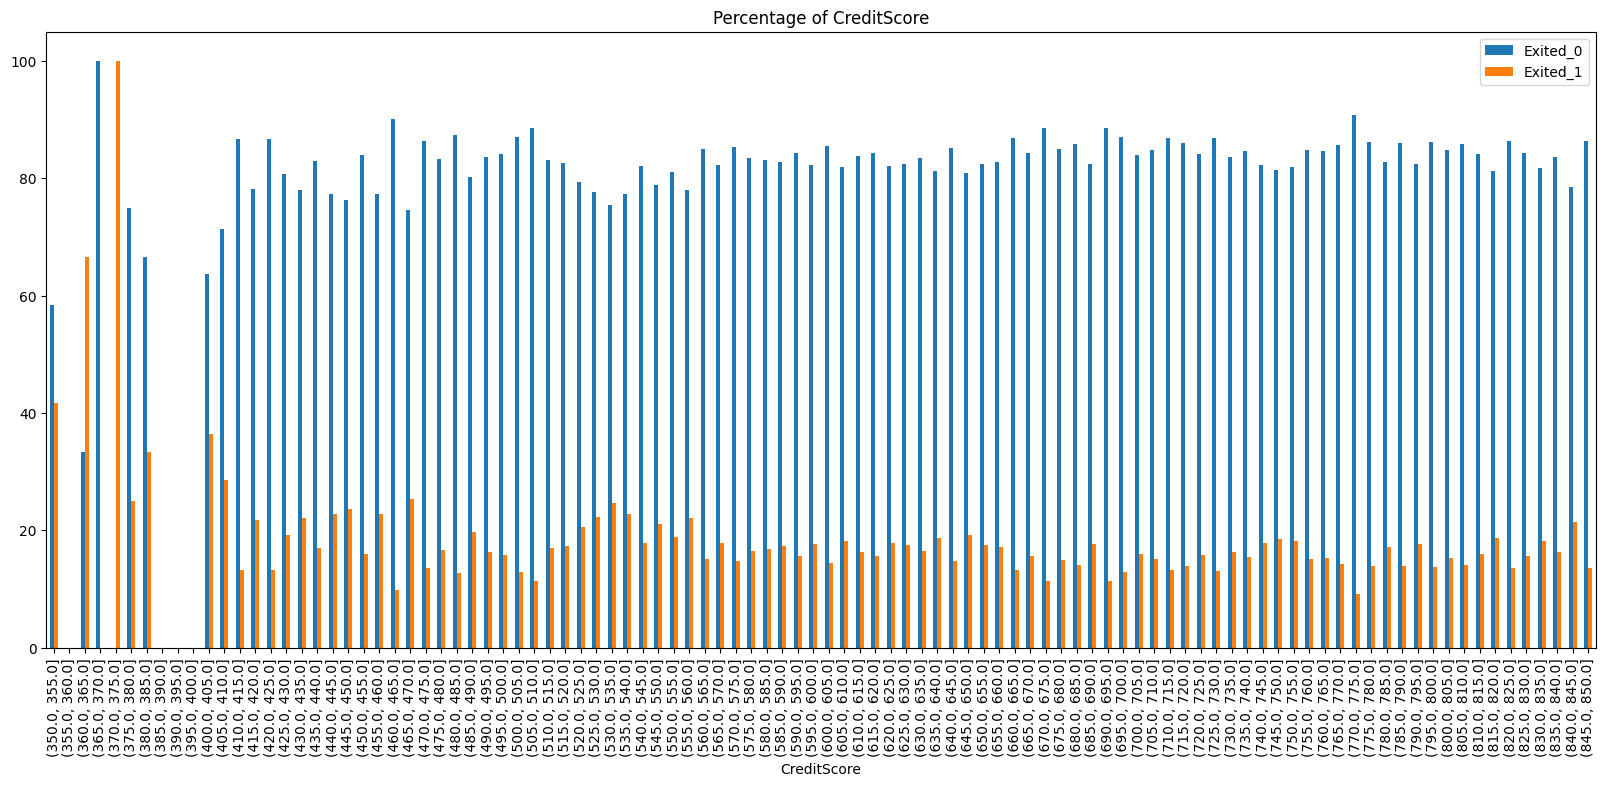

<Figure size 2000x800 with 0 Axes>

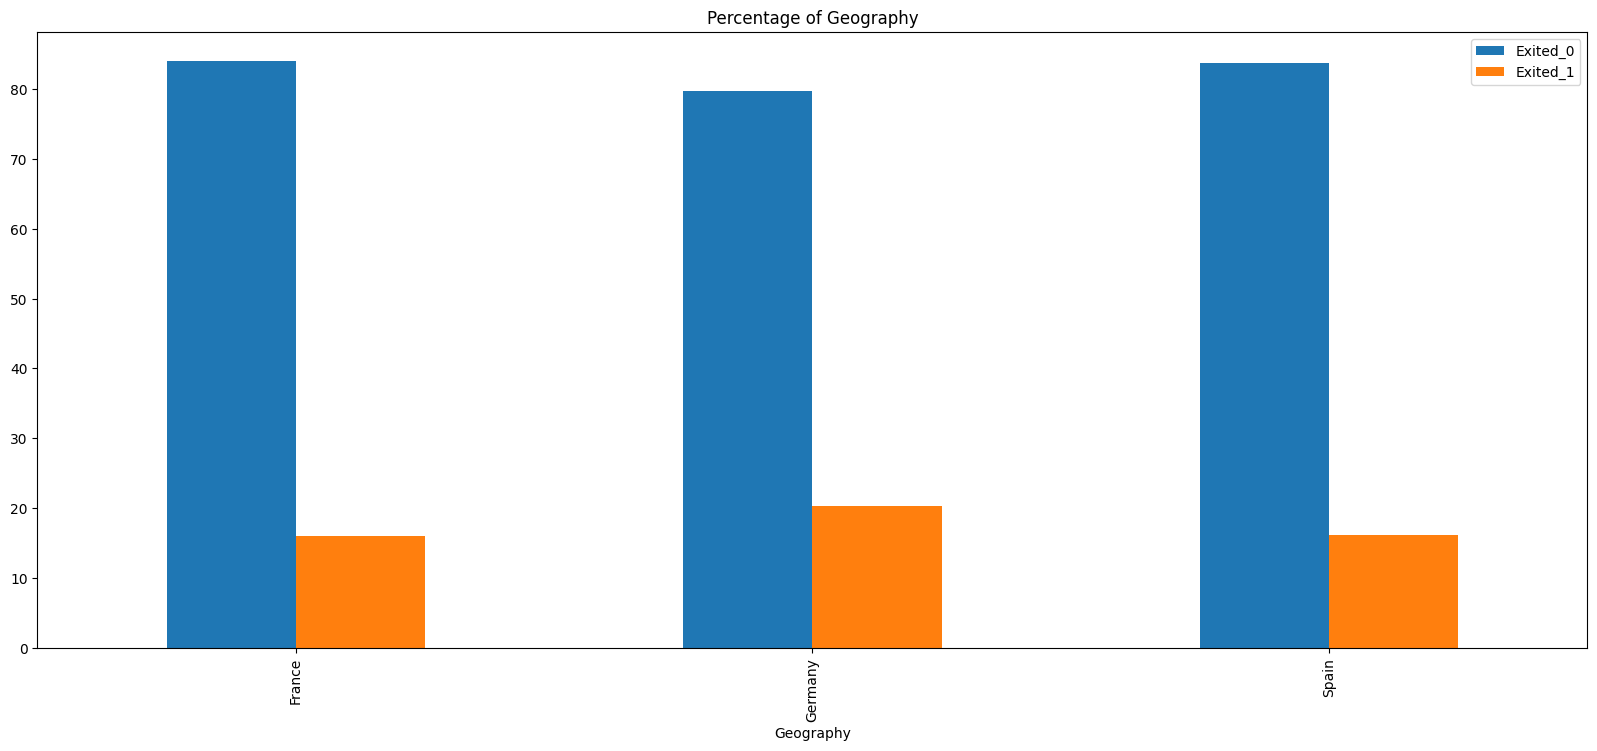

<Figure size 2000x800 with 0 Axes>

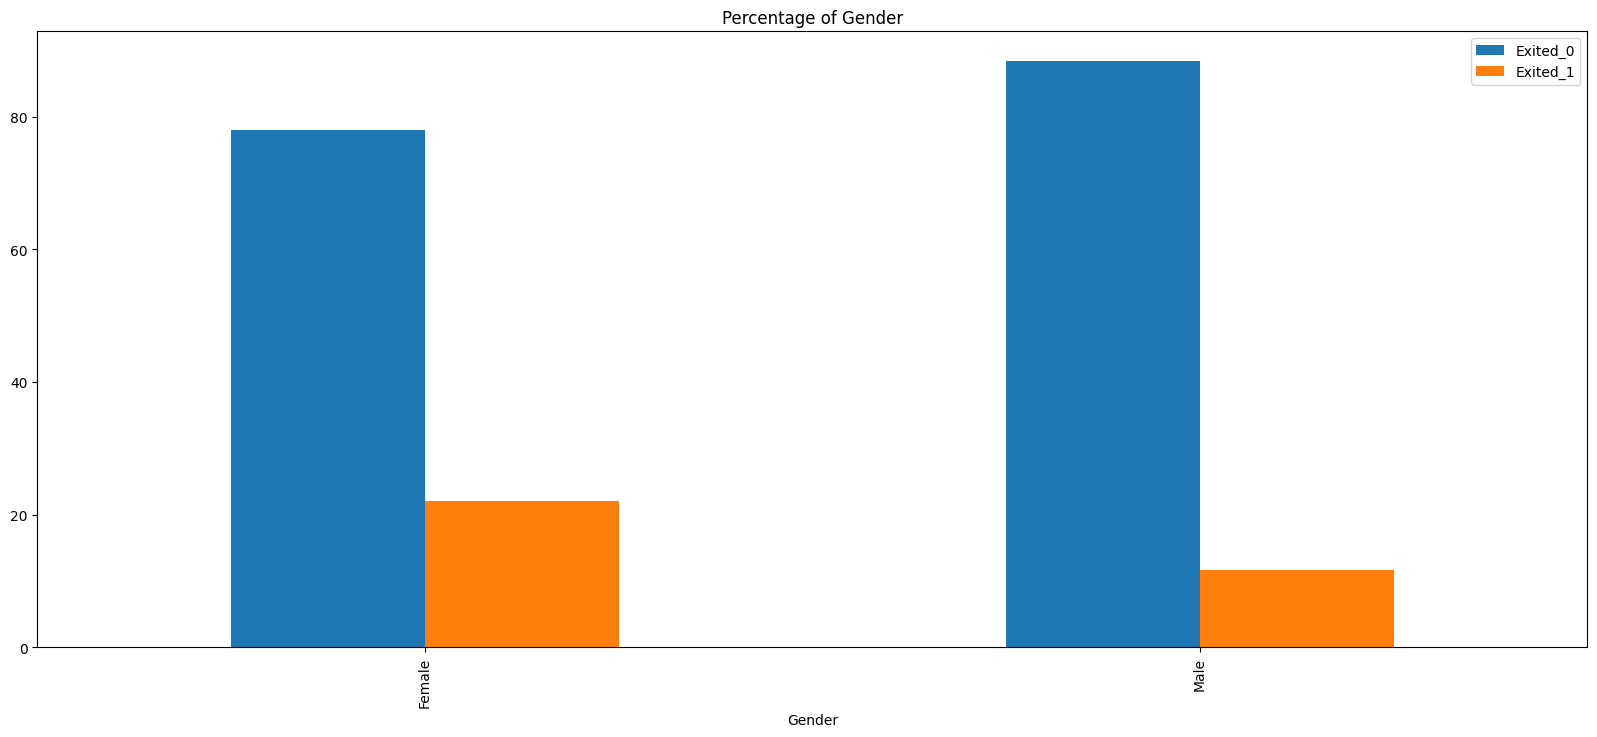

<Figure size 2000x800 with 0 Axes>

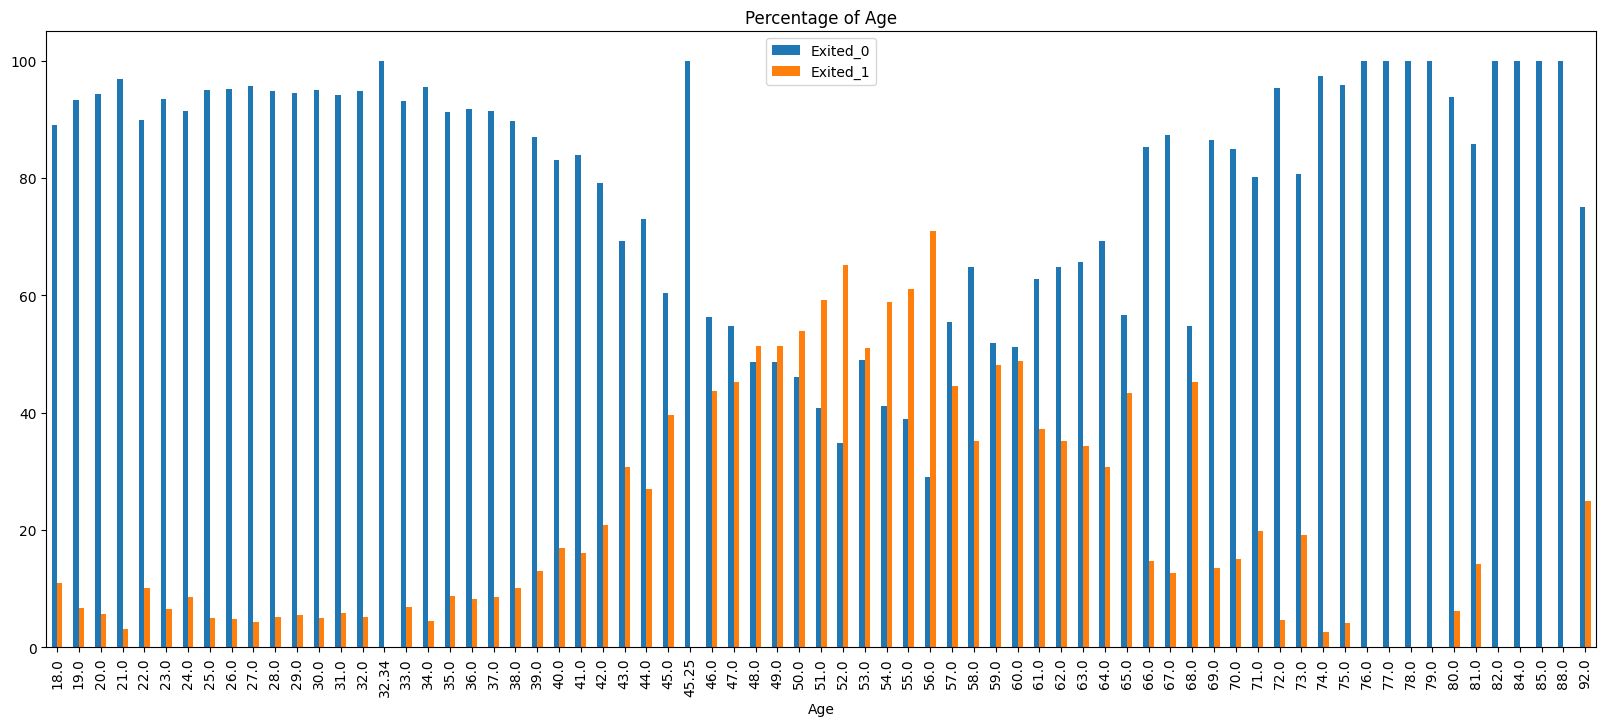

<Figure size 2000x800 with 0 Axes>

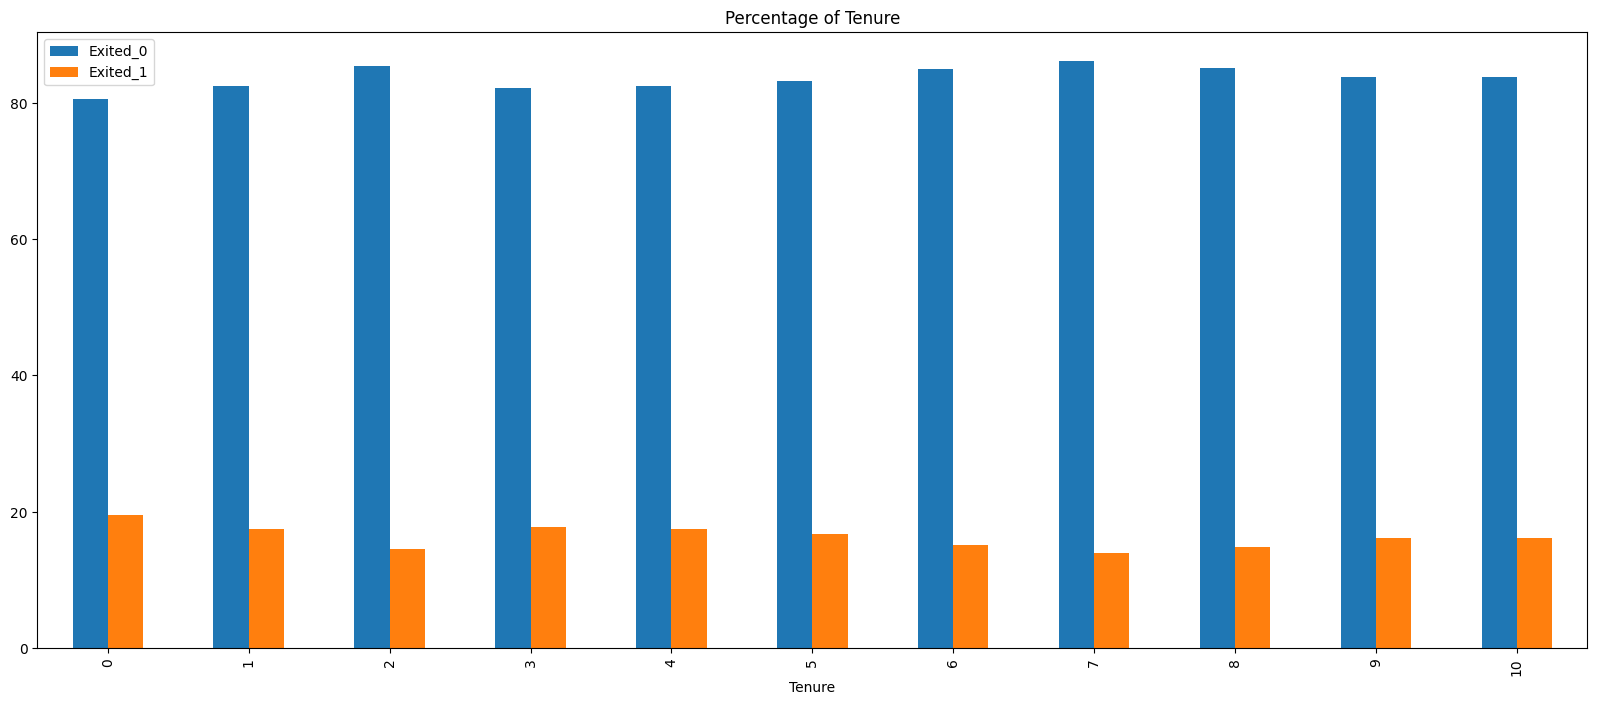

<Figure size 2000x800 with 0 Axes>

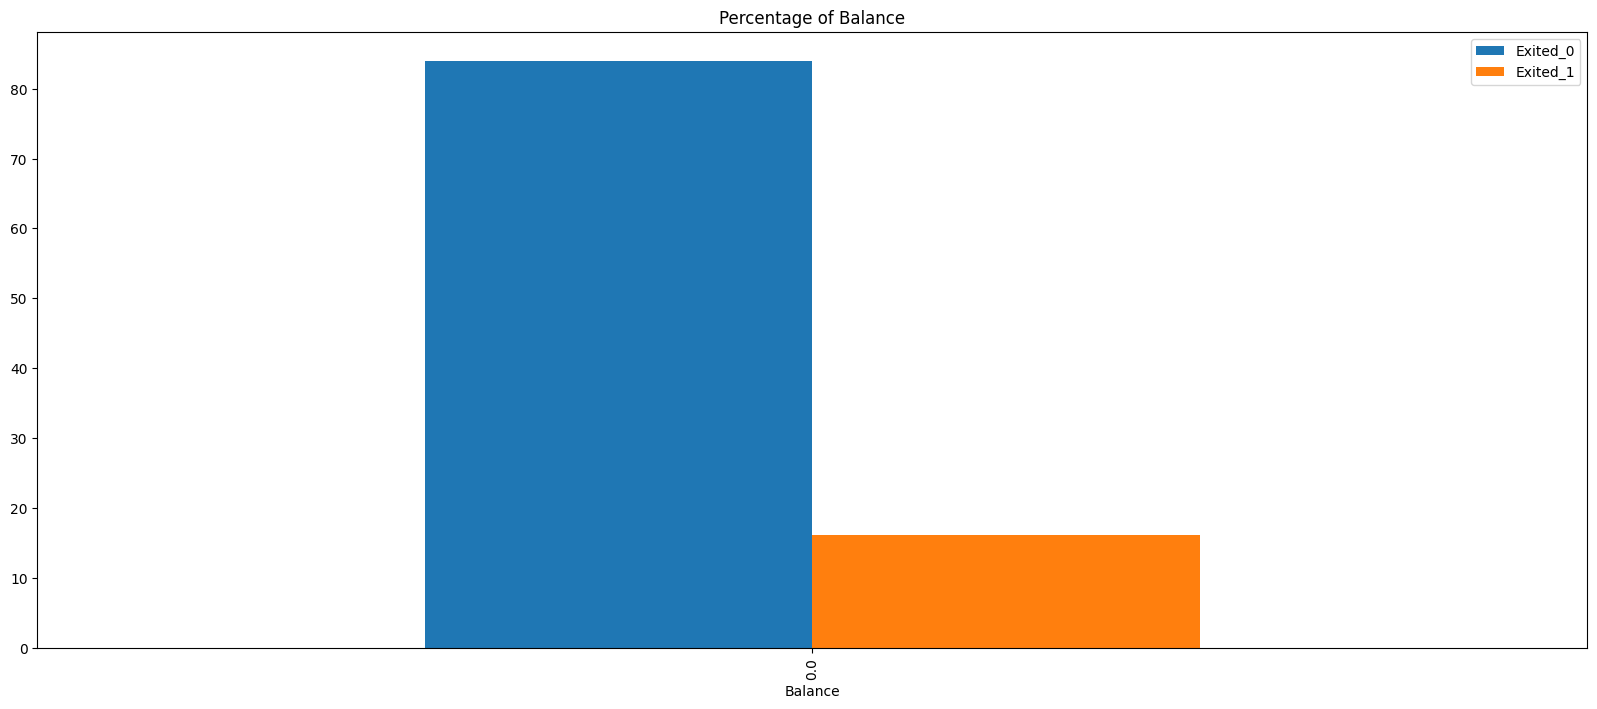

<Figure size 2000x800 with 0 Axes>

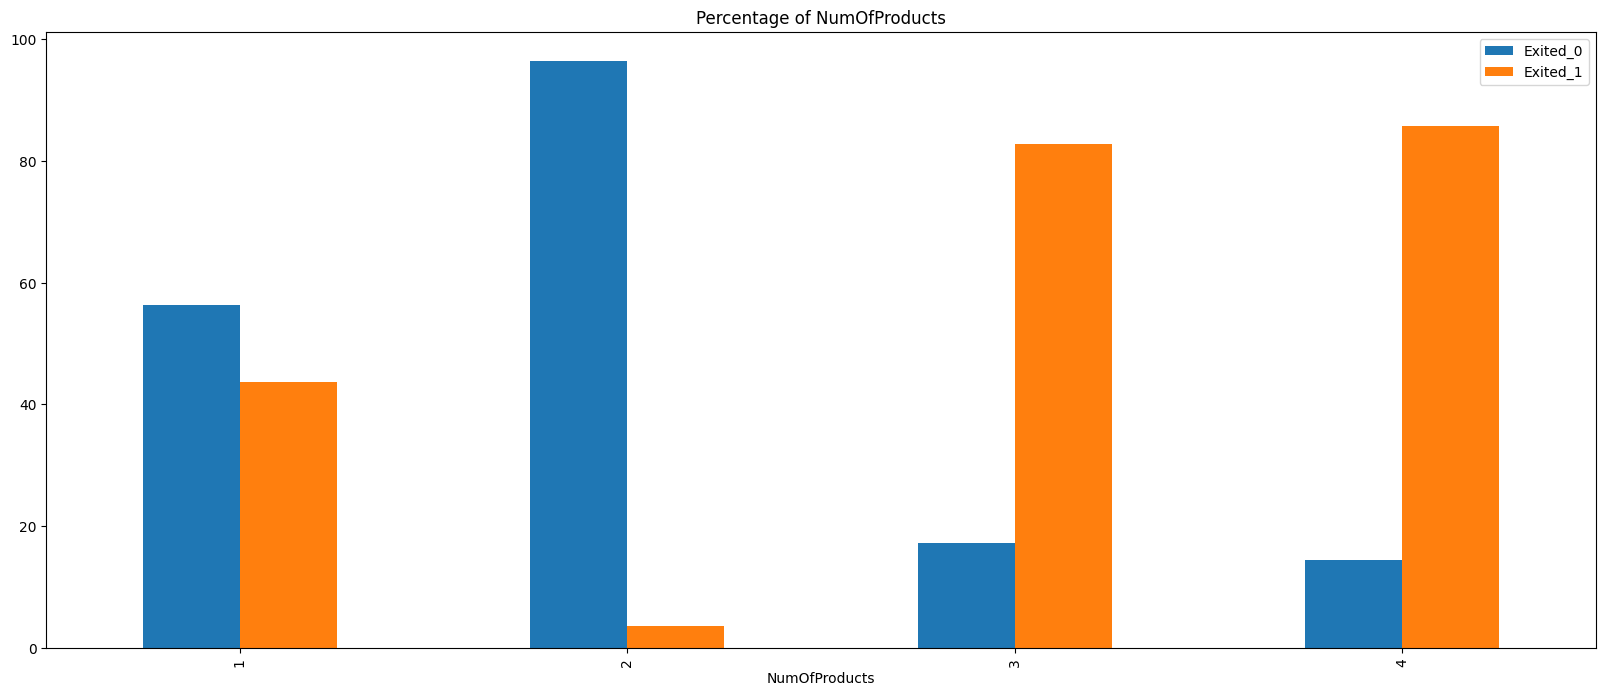

<Figure size 2000x800 with 0 Axes>

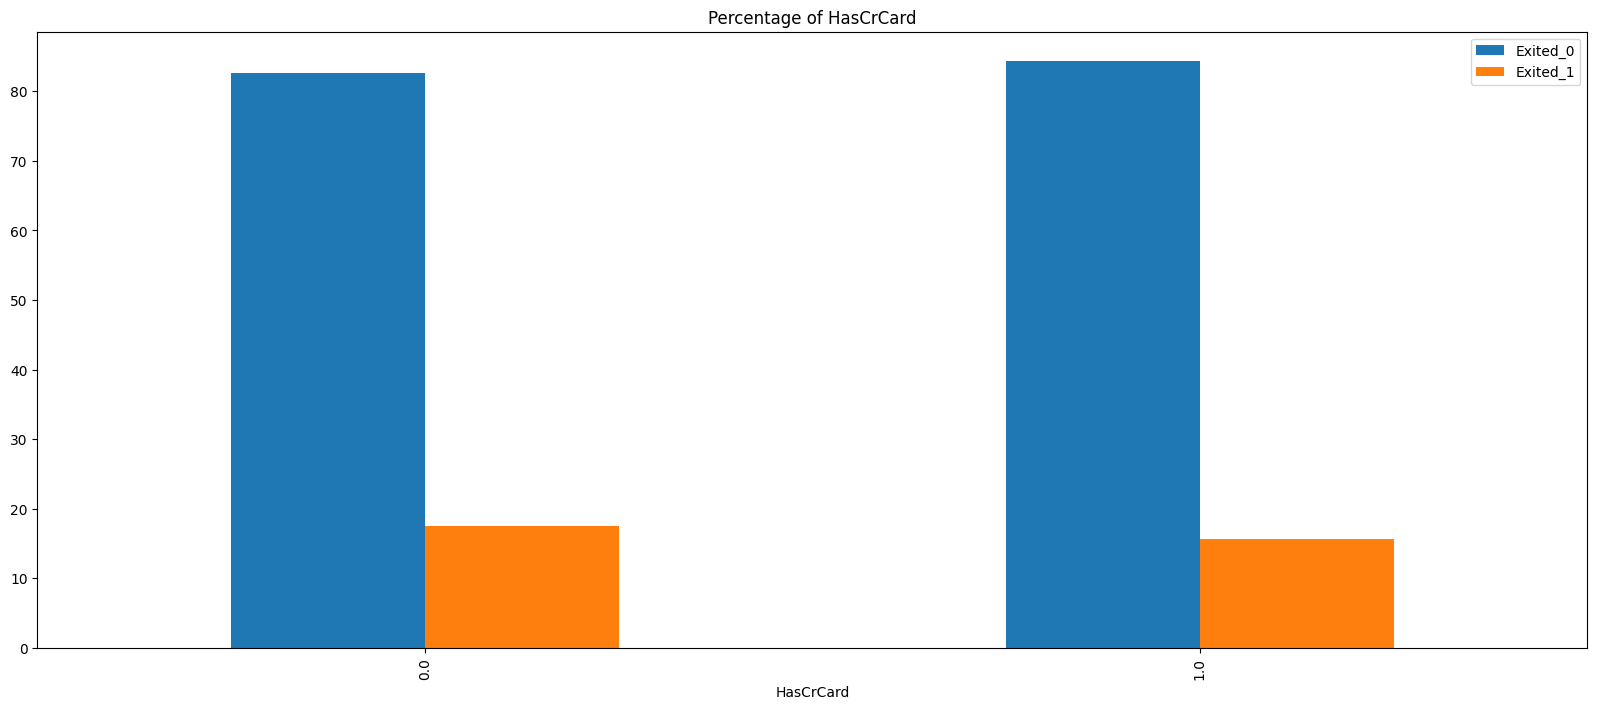

<Figure size 2000x800 with 0 Axes>

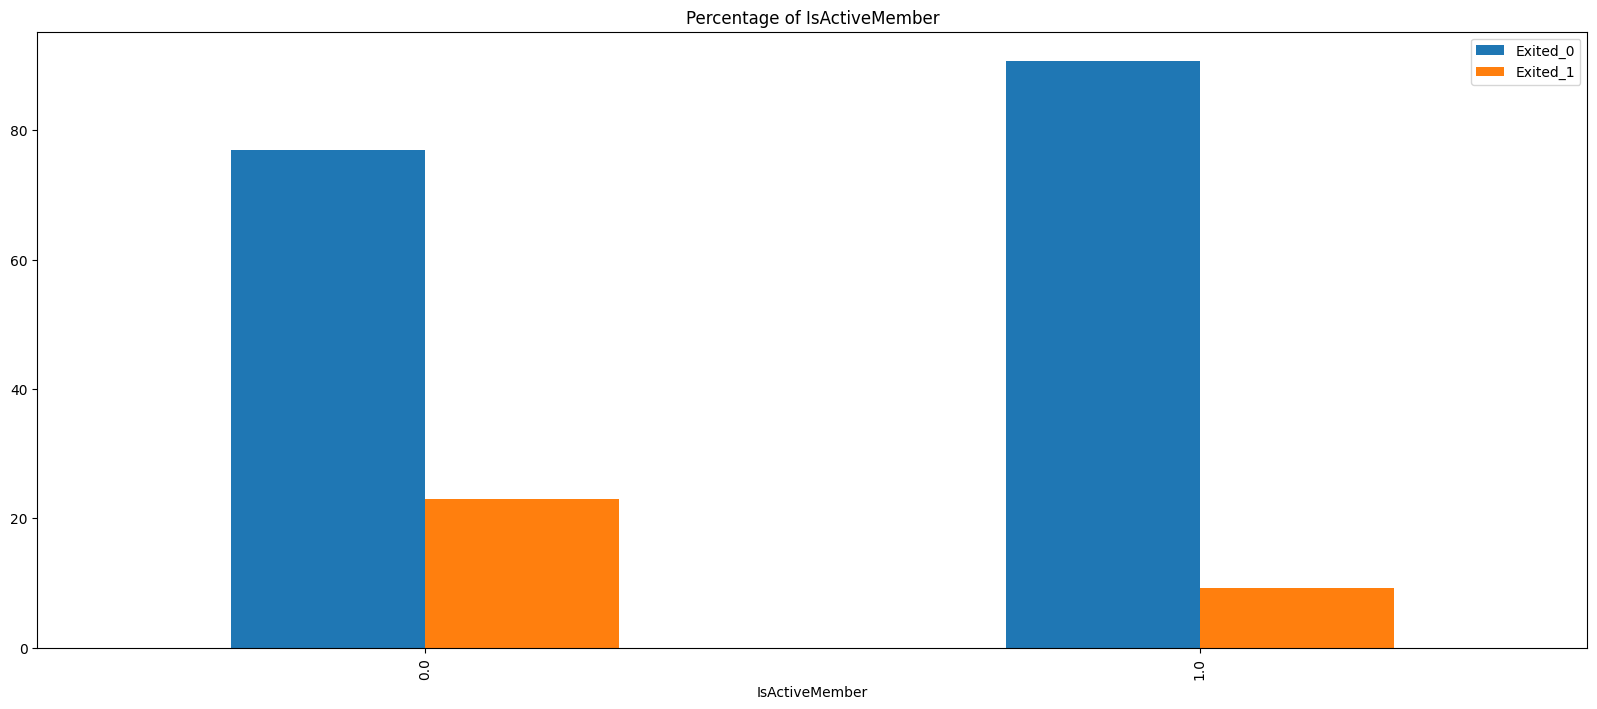

<Figure size 2000x800 with 0 Axes>

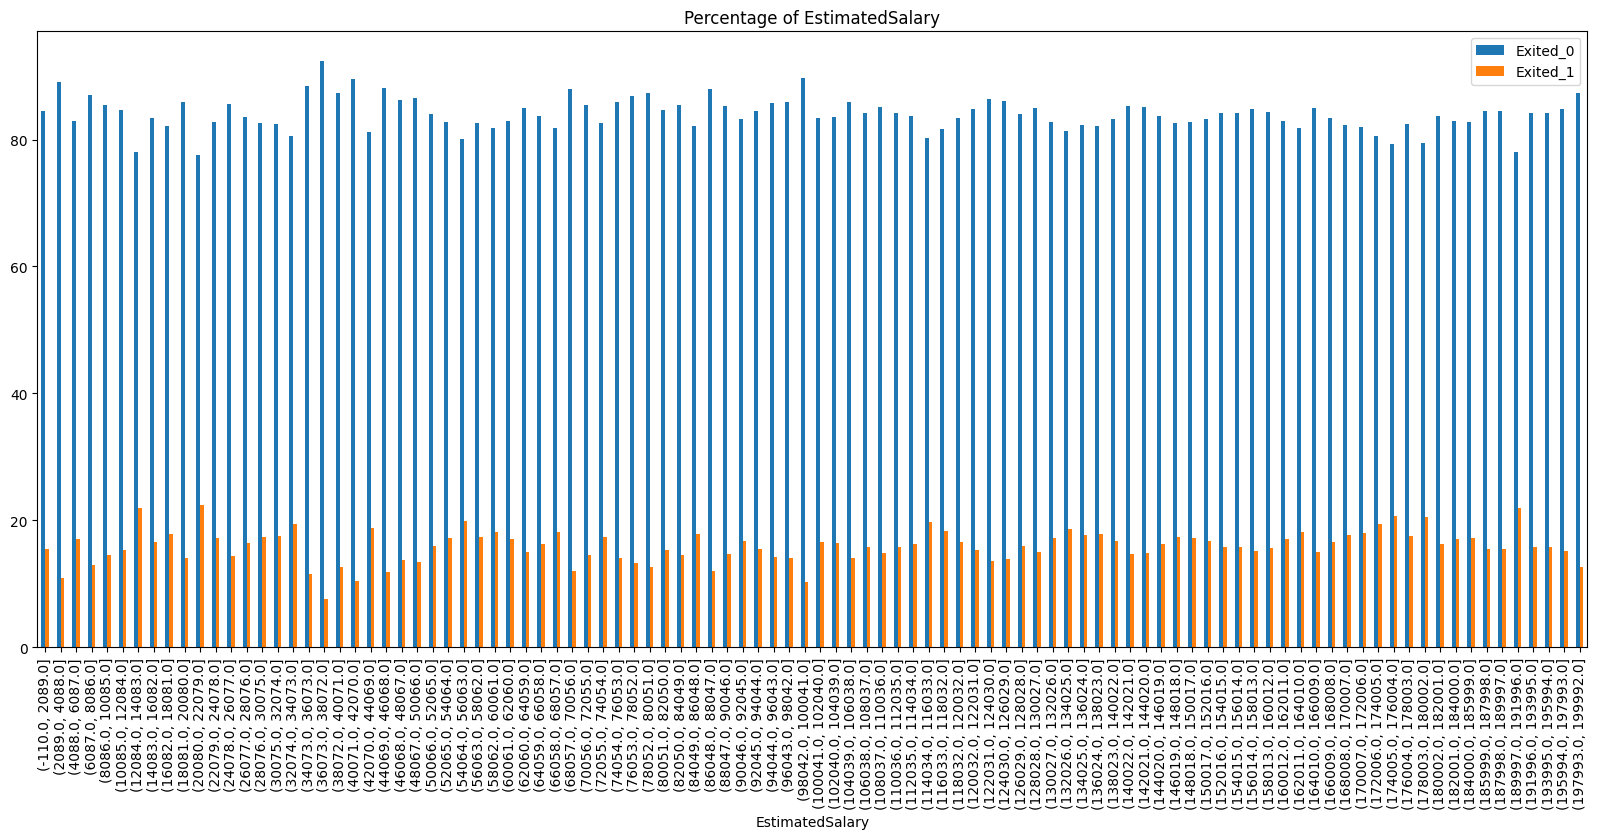

In [47]:
columns = error_occur_data.drop(["id", "CustomerId", "Surname", "Exited"], axis=1).columns
for column in columns:
    size = error_occur_data[column].value_counts().shape[0]
    plotting(column, k = 100 if size >= 100 else -1)

In [38]:
mask = error_occur_data['Exited'] == 0
data_0 = error_occur_data[mask].drop(["id", "CustomerId", "Surname"], axis=1)
data_1 = error_occur_data[~mask].drop(["id", "CustomerId", "Surname"], axis=1)
